<a href="https://colab.research.google.com/github/antoineor/SNCF-Challenge-DataENS/blob/main/SNCF_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

np.set_printoptions(threshold=100)

**DATA LOADING**

In [ ]:
path = '/content/drive/MyDrive/Challenges Data/SNCF/'

x_train = pd.read_csv(path + 'x_train_final.csv')
y_train = pd.read_csv(path + 'y_train_final_j5KGWWK.csv')

#Drop useless columns
x_train = x_train.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)
y_train = y_train.drop(['Unnamed: 0'], axis = 1)

df = pd.merge(x_train, y_train, left_index = True, right_index = True)
df.rename(columns = {'p0q0':'label'}, inplace = True)

df['date'] = pd.to_datetime(df['date'])

In [ ]:
#To supp

path = '/content/drive/MyDrive/Challenges Data/SNCF/'

x_train1 = pd.read_csv(path + 'x_train_final.csv')
y_train1 = pd.read_csv(path + 'y_train_final_j5KGWWK.csv')

#Drop useless columns
x_train1 = x_train1.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)
y_train1 = y_train1.drop(['Unnamed: 0'], axis = 1)

df1 = pd.merge(x_train1, y_train1, left_index = True, right_index = True)
df1.rename(columns = {'p0q0':'label'}, inplace = True)

df1['date'] = pd.to_datetime(df1['date'])

In [ ]:
#sample for mimmic sub

df_test = df1[df1['date'] > "2023-10-01"].sample(20657)

**INSIGHTS ABOUT DATA**

<Axes: >

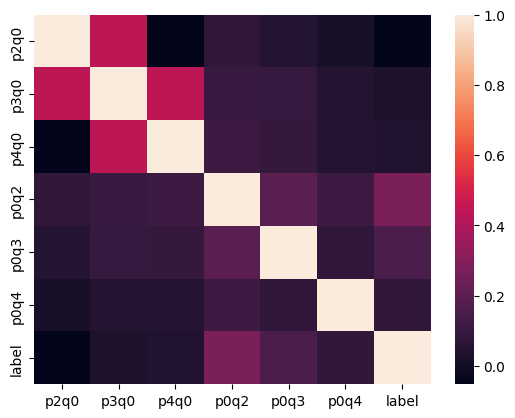

In [ ]:
#p0q2 and p0q3 are the most relevant

corr_matrix = df[['p2q0', 'p3q0', 'p4q0', 'p0q2', 'p0q3', 'p0q4', 'label']].corr()

sns.heatmap(corr_matrix)

<Axes: xlabel='date', ylabel='Count'>

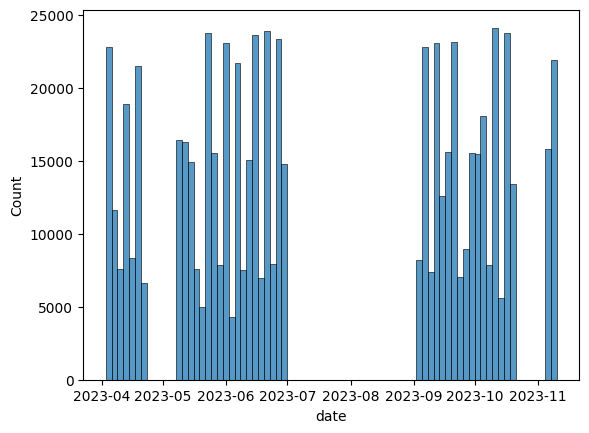

In [ ]:
#We don't have hollidays

sns.histplot(df['date'])

**FEATURE GARE QUALITY**

In [ ]:
gare_means = df.groupby('gare')['label'].agg(['mean', 'count']).sort_values(by = 'mean')
gare_means

,mean,count
gare,,
OML,-2.219774,12572
HVA,-1.689463,3056
PDG,-1.153846,13
KCK,-1.145228,21449
MZE,-0.971737,6758
...,...,...
XEH,0.725646,12801
XJU,0.729939,2966
GHU,1.015641,3005


In [ ]:
groups = [group["label"].dropna().values for _, group in df.groupby("gare")]


In [ ]:
#We reject the null hypothesis of no significance

import scipy.stats as stats

F_stat, p_value = stats.f_oneway(*groups)

print(f"Statistique F : {F_stat:.4f}")
print(f"P-valeur : {p_value:.4e}")

Statistique F : 988.8825
P-valeur : 0.0000e+00


In [ ]:
def normalize_column(values):
    themean = np.mean(values)
    thestd = np.std(values)
    norm = (values - themean)/(thestd)
    return(pd.DataFrame(norm))

def gare_quality():
    formula = 'label~1+gare'
    glm = sm.GLM.from_formula(formula=formula,
                              data= df,
                              family=sm.families.Binomial()).fit()
    quality = pd.DataFrame(glm.params).reset_index()
    quality.columns = ['gare','quality']
    quality['quality'] = normalize_column(quality['quality'])

    quality['quality'] = np.exp(quality['quality'])

    print(quality['quality'].mean(), quality['quality'].std())
    return quality

In [ ]:
model = sm.GLM.from_formula("label ~ C(gare)", data=df, family=sm.families.Gaussian()).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  label   No. Observations:               667264
Model:                            GLM   Df Residuals:                   667180
Model Family:                Gaussian   Df Model:                           83
Link Function:               Identity   Scale:                          3.5192
Method:                          IRLS   Log-Likelihood:            -1.3666e+06
Date:                Sat, 29 Mar 2025   Deviance:                   2.3479e+06
Time:                        09:44:58   Pearson chi2:                 2.35e+06
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1157
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7123      0.220      3.244      0.001       0.282       1.143
C(gare)[T.ARX]    -1.6016      0.220     -7.266      0.000      -2.034      -1.170
C(gare)[T.AUW]    -0.7993      0.221     -3.618      0.000      -1.232      -0.366
C(gare)[T.AVF]    -1.1950      0.220     -5.420      0.000      -1.627      -0.763
C(gare)[T.AVU]    -1.2272      0.221     -5.565      0.000      -1.659      -0.795
C(gare)[T.AZA]    -0.9738      0.220     -4.422      0.000      -1.405      -0.542
C(gare)[T.BAP]    -0.9577      0.220     -4.349      0.000      -1.389      -0.526
C(gare)[T.BKS]    -0.2429      0.346     -0.701      0.483      -0.922       0.436
C(gare)[T.CFK]    -0.7156      0.220     -3.247      0.001      -1.148      -0.284
C(gare)[T.DCD]    -0.6174      0.224     -2.761      0.006      -1.056      -0.179
C(gare)[T.DGG]    -0.3041      0.221     -1.379      0.168      -0.737       0.128
C(gare)[T.EAU]    -0.8687      0.221     -3.940      0.000      -1.301      -0.437
C(gare)[T.ELZ]    -1.0135      0.220     -4.606      0.000      -1.445      -0.582
C(gare)[T.EME]    -0.6923      0.344     -2.010      0.044      -1.367      -0.017
C(gare)[T.EOH]    -0.5353      0.220     -2.435      0.015      -0.966      -0.104
C(gare)[T.FDV]    -0.8603      0.223     -3.855      0.000      -1.298      -0.423
C(gare)[T.FFU]    -0.2087      0.221     -0.945      0.344      -0.641       0.224
C(gare)[T.GDN]    -0.2829      0.221     -1.278      0.201      -0.717       0.151
C(gare)[T.GDU]    -0.2710      0.220     -1.231      0.218      -0.703       0.161
C(gare)[T.GHQ]    -1.2313      0.251     -4.903      0.000      -1.723      -0.739
C(gare)[T.GHU]     0.3033      0.222      1.365      0.172      -0.132       0.739
C(gare)[T.HVA]    -2.4018      0.222    -10.811      0.000      -2.837      -1.966
C(gare)[T.IEG]    -0.8267      0.223     -3.711      0.000      -1.263      -0.390
C(gare)[T.JAQ]    -0.0101      0.228     -0.044      0.965      -0.458       0.438
C(gare)[T.JBZ]    -0.4502      0.220     -2.045      0.041      -0.882      -0.019
C(gare)[T.JEQ]    -0.9505      0.221     -4.296      0.000      -1.384      -0.517
C(gare)[T.JLR]    -0.4093      0.220     -1.862      0.063      -0.840       0.022
C(gare)[T.JOD]    -0.4082      0.258     -1.585      0.113      -0.913       0.097
C(gare)[T.JUJ]    -1.1139      0.220     -5.054      0.000      -1.546      -0.682
C(gare)[T.JYH]    -1.1798      0.221     -5.339      0.000      -1.613      -0.747
C(gare)[T.KCK]    -1.8576      0.220     -8.446      0.000      -2.289      -1.426
C(gare)[T.KDN]    -0.0471      0.221     -0.213      0.831      -0.479       0.385
C(gare)[T.KLN]    -0.7264      0.221     -3.294      0.001      -1.159      -0.294
C(gare)[T.KOG]    -1.1423      0.220     -5.187      0.000      -1.574      -0.711
C(gare)[T.KY

In [ ]:
gare_quality = model.params.filter(like="C(gare)").to_dict()

insignificant_stations = model.pvalues[model.pvalues > 0.05].index

# Set the gare quality for insignificant stations to 0
# for station in insignificant_stations:
#     gare_quality[station] = 0  # No effect

# Map back to dataset
df["gare_quality"] = df["gare"].map(lambda g: gare_quality.get(f"C(gare)[T.{g}]", 0))

<Axes: xlabel='gare_quality', ylabel='Count'>

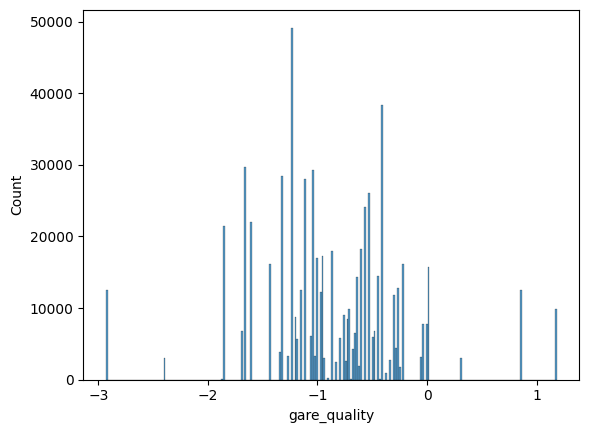

In [ ]:
sns.histplot(data = df, x = 'gare_quality')

**FEATURE DAY OF THE WEEK**

In [ ]:
df["day_of_week"] = df["date"].dt.weekday

In [ ]:
#We don't have weekend
df.groupby('day_of_week')['label'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
day_of_week,,
3,-0.183048,126967
4,-0.169280,132065
1,-0.157965,143538
2,-0.146210,143745
0,-0.144201,120949


In [ ]:
#We reject the null hypothesis of no statistical significance

groups = [group["label"].dropna().values for _, group in df.groupby("day_of_week")]

F_stat, p_value = stats.f_oneway(*groups)

print(f"Statistique F : {F_stat:.4f}")
print(f"P-valeur : {p_value:.4e}")

Statistique F : 8.6635
P-valeur : 5.4737e-07


**FEATURE GARE FREQ PER DAY**

In [ ]:
freq_par_gare = df['gare'].value_counts().rename('gare_freq')
nb_jours = df[['gare', 'date']].groupby(['gare']).nunique().rename({'date': 'nbjours'}, axis = 1)
new_feat = pd.merge(nb_jours,freq_par_gare, left_index = True, right_index = True)
new_feat['trainperday'] = new_feat['gare_freq'] / new_feat['nbjours']
new_feat.head(3)

,nbjours,gare_freq,trainperday
gare,,,
ADU,55,73,1.327273
ARX,91,9507,104.472527
AUW,91,5758,63.274725


In [ ]:
new_feat

,nbjours,gare_freq,trainperday
gare,,,
ADU,55,73,1.327273
ARX,91,9507,104.472527
AUW,91,5758,63.274725
AVF,90,8762,97.355556
AVU,90,8523,94.700000
...,...,...,...
YWQ,91,5751,63.197802
ZAL,91,2845,31.263736
ZFB,91,18559,203.945055


<Axes: xlabel='mean', ylabel='trainperday'>

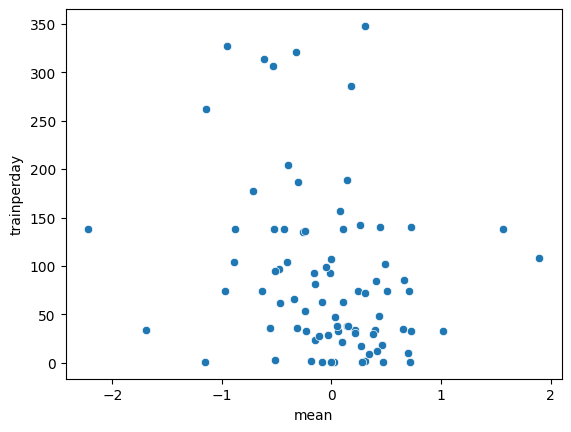

In [ ]:
sns.scatterplot(x = gare_means['mean'], y = new_feat['trainperday'])

In [ ]:
to_add = pd.merge(df, new_feat, left_on = 'gare', right_index = True, how = 'left')['trainperday']
df['trainperday'] = to_add

**WEIGHTED LAGGED**

In [ ]:
df

,train,gare,date,arret,p2q0,p3q0,p4q0,p0q2,p0q3,p0q4,label,gare_quality,day_of_week,trainperday
0,VBXNMF,KYF,2023-04-03,8,0.0,0.0,1.0,-3.0,-1.0,-2.0,-1.0,-1.662088,0,326.780220
1,VBXNMF,JLR,2023-04-03,9,0.0,0.0,0.0,1.0,0.0,1.0,-1.0,-0.409323,0,347.725275
2,VBXNMF,EOH,2023-04-03,10,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-0.535311,0,286.120879
3,VBXNMF,VXY,2023-04-03,11,-1.0,-1.0,0.0,2.0,-2.0,0.0,1.0,-1.242571,0,305.956044
4,VBXNMF,OCB,2023-04-03,12,-1.0,-1.0,-1.0,-1.0,3.0,2.0,3.0,-1.034943,0,321.208791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667259,BFNJJK,DGG,2023-11-10,22,0.0,-1.0,-6.0,-1.0,0.0,-2.0,1.0,-0.304134,4,84.208791
667260,BFNJJK,KDN,2023-11-10,23,0.0,0.0,-1.0,1.0,0.0,0.0,2.0,-0.047080,4,85.252747
667261,BFNJJK,TVD,2023-11-10,24,1.0,0.0,0.0,-1.0,-3.0,-1.0,2.0,-0.221061,4,102.560440
667262,BFNJJK,TXP,2023-11-10,26,2.0,2.0,1.0,0.0,0.0,1.0,1.0,-0.371180,4,9.373626


In [ ]:
weights = [1.5, 0.8, 0.2]
df['weighted_lag_q'] = weights[0]*df['p0q2'] + weights[1]*df['p0q3'] + weights[2]*df['p0q4']
df['weighted_lag_p'] = weights[0]*df['p2q0'] + weights[1]*df['p3q0'] + weights[2]*df['p4q0']

**MEAN BEST LAG PER DAY**

In [ ]:
#Only for p0q2

to_add = df.groupby('date')['p0q2'].mean().rename({'p0q2' : 'p0q2_meanday'})

df = pd.merge(df, to_add, left_on = 'date', right_index = True)


In [ ]:
df

,train,gare,date,arret,p2q0,p3q0,p4q0,p0q2_x,p0q3,p0q4,label,gare_quality,day_of_week,trainperday,weighted_lag_q,weighted_lag_p,p0q2_y
0,VBXNMF,KYF,2023-04-03,8,0.0,0.0,1.0,-3.0,-1.0,-2.0,-1.0,-1.662088,0,326.780220,-5.7,0.2,-0.073450
1,VBXNMF,JLR,2023-04-03,9,0.0,0.0,0.0,1.0,0.0,1.0,-1.0,-0.409323,0,347.725275,1.7,0.0,-0.073450
2,VBXNMF,EOH,2023-04-03,10,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-0.535311,0,286.120879,-1.5,-1.5,-0.073450
3,VBXNMF,VXY,2023-04-03,11,-1.0,-1.0,0.0,2.0,-2.0,0.0,1.0,-1.242571,0,305.956044,1.4,-2.3,-0.073450
4,VBXNMF,OCB,2023-04-03,12,-1.0,-1.0,-1.0,-1.0,3.0,2.0,3.0,-1.034943,0,321.208791,1.3,-2.5,-0.073450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667259,BFNJJK,DGG,2023-11-10,22,0.0,-1.0,-6.0,-1.0,0.0,-2.0,1.0,-0.304134,4,84.208791,-1.9,-2.0,-0.902647
667260,BFNJJK,KDN,2023-11-10,23,0.0,0.0,-1.0,1.0,0.0,0.0,2.0,-0.047080,4,85.252747,1.5,-0.2,-0.902647
667261,BFNJJK,TVD,2023-11-10,24,1.0,0.0,0.0,-1.0,-3.0,-1.0,2.0,-0.221061,4,102.560440,-4.1,1.5,-0.902647
667262,BFNJJK,TXP,2023-11-10,26,2.0,2.0,1.0,0.0,0.0,1.0,1.0,-0.371180,4,9.373626,0.2,4.8,-0.902647


**TRANSFORMATION**

In [ ]:
from sklearn.preprocessing import QuantileTransformer

features_to_trans = ['p2q0', 'p3q0', 'p4q0', 'p0q2_x','p0q3', 'p0q4','weighted_lag_q', 'weighted_lag_p', 'p0q2_y']
qtf = QuantileTransformer(output_distribution='normal')
qtl = QuantileTransformer(output_distribution='normal')

df[features_to_trans] = qtf.fit_transform(df[features_to_trans])
df['label_trans'] = qtl.fit_transform(df['label'].values.reshape(-1, 1))

In [ ]:
df

,train,gare,date,arret,p2q0,p3q0,p4q0,p0q2_x,p0q3,p0q4,label,gare_quality,day_of_week,trainperday,weighted_lag_q,weighted_lag_p,p0q2_y,label_trans
0,VBXNMF,KYF,2023-04-03,8,0.030114,0.045180,0.999986,-1.865852,-0.868016,-1.475269,-1.0,-1.662088,0,326.780220,-1.792374,0.267884,1.418119,-0.835558
1,VBXNMF,JLR,2023-04-03,9,0.030114,0.045180,0.051460,0.957454,0.012546,0.953493,-1.0,-0.409323,0,347.725275,0.963423,0.042668,1.418119,-0.835558
2,VBXNMF,EOH,2023-04-03,10,-0.846279,0.045180,0.051460,-0.839121,0.012546,0.011291,-1.0,-0.535311,0,286.120879,-0.645631,-0.728240,1.418119,-0.835558
3,VBXNMF,VXY,2023-04-03,11,-0.846279,-0.830234,0.051460,1.750222,-1.482760,0.011291,1.0,-1.242571,0,305.956044,0.718462,-1.016672,1.418119,0.959440
4,VBXNMF,OCB,2023-04-03,12,-0.846279,-0.830234,-0.828465,-0.839121,2.345158,1.780005,3.0,-1.034943,0,321.208791,0.715218,-1.102440,1.418119,2.307607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667259,BFNJJK,DGG,2023-11-10,22,0.030114,-0.830234,-2.511791,-0.839121,0.012546,-1.475269,1.0,-0.304134,4,84.208791,-0.839121,-0.903301,-5.199338,0.959440
667260,BFNJJK,KDN,2023-11-10,23,0.030114,0.045180,-0.828465,0.957454,0.012546,0.011291,2.0,-0.047080,4,85.252747,0.795322,-0.181652,-5.199338,1.767903
667261,BFNJJK,TVD,2023-11-10,24,0.967422,0.045180,0.051460,-0.839121,-1.873053,-0.855287,2.0,-0.221061,4,102.560440,-1.479004,0.892038,-5.199338,1.767903
667262,BFNJJK,TXP,2023-11-10,26,1.744448,1.727466,0.999986,0.025094,0.012546,0.953493,1.0,-0.371180,4,9.373626,0.239380,2.325972,-5.199338,0.959440


**TRAINING AND TEST - XGBOOST**

In [ ]:
#Training with MSE - Validating with MAE

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric="mae",
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)

def mae_evaluation(pred, real):
  pred_nt = qtl.inverse_transform(pred.reshape(-1, 1)).ravel()
  return mean_absolute_error(pred_nt, real)


def evaluate_model(model, df, features):
    df_train = df[df['date'] <= "2023-10-01"]
    df_test = df[df['date'] > "2023-10-01"]
    X_train, y_train = df_train[features], df_train['label_trans']

    X_test, y_test = df_test[features], df_test['label']
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    res = mae_evaluation(pred, y_test)
    return res

features = ['arret', 'p2q0', 'p3q0', 'p4q0', 'p0q2_x','p0q3', 'p0q4', 'gare_quality', 'day_of_week', 'trainperday', 'weighted_lag_q' ]

#la feature en mean day fait baisser mais à voir à quel point elle se généralise -> déterminer si on la rajoute ou pas

evaluate_model(xgb_model, df, features)

0.6454159705136067

In [ ]:
pred = xgb_model.predict(df[features])

In [ ]:
df['xgb_pred'] = pred
df

,train,gare,date,arret,p2q0,p3q0,p4q0,p0q2_x,p0q3,p0q4,label,gare_quality,day_of_week,trainperday,weighted_lag_q,weighted_lag_p,p0q2_y,label_trans,xgb_pred
0,VBXNMF,KYF,2023-04-03,8,0.030114,0.045180,0.999986,-1.865852,-0.868016,-1.475269,-1.0,-1.662088,0,326.780220,-1.792374,0.267884,1.418119,-0.835558,-1.309720
1,VBXNMF,JLR,2023-04-03,9,0.030114,0.045180,0.051460,0.957454,0.012546,0.953493,-1.0,-0.409323,0,347.725275,0.963423,0.042668,1.418119,-0.835558,0.112786
2,VBXNMF,EOH,2023-04-03,10,-0.846279,0.045180,0.051460,-0.839121,0.012546,0.011291,-1.0,-0.535311,0,286.120879,-0.645631,-0.728240,1.418119,-0.835558,-0.007670
3,VBXNMF,VXY,2023-04-03,11,-0.846279,-0.830234,0.051460,1.750222,-1.482760,0.011291,1.0,-1.242571,0,305.956044,0.718462,-1.016672,1.418119,0.959440,-0.149599
4,VBXNMF,OCB,2023-04-03,12,-0.846279,-0.830234,-0.828465,-0.839121,2.345158,1.780005,3.0,-1.034943,0,321.208791,0.715218,-1.102440,1.418119,2.307607,0.336040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667259,BFNJJK,DGG,2023-11-10,22,0.030114,-0.830234,-2.511791,-0.839121,0.012546,-1.475269,1.0,-0.304134,4,84.208791,-0.839121,-0.903301,-5.199338,0.959440,0.305665
667260,BFNJJK,KDN,2023-11-10,23,0.030114,0.045180,-0.828465,0.957454,0.012546,0.011291,2.0,-0.047080,4,85.252747,0.795322,-0.181652,-5.199338,1.767903,0.641998
667261,BFNJJK,TVD,2023-11-10,24,0.967422,0.045180,0.051460,-0.839121,-1.873053,-0.855287,2.0,-0.221061,4,102.560440,-1.479004,0.892038,-5.199338,1.767903,0.237121
667262,BFNJJK,TXP,2023-11-10,26,1.744448,1.727466,0.999986,0.025094,0.012546,0.953493,1.0,-0.371180,4,9.373626,0.239380,2.325972,-5.199338,0.959440,1.067643


**STACKING A DL NETWORK**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
features = ['arret', 'p2q0', 'p3q0', 'p4q0', 'p0q2_x','p0q3', 'p0q4', 'gare_quality', 'day_of_week', 'trainperday', 'weighted_lag_q' , 'xgb_pred']
features = ['p2q0', 'p0q2_x', 'gare_quality', 'xgb_pred']
df_train = df[df['date'] <= "2023-10-01"]
df_test = df[df['date'] > "2023-10-01"]
X_train, y_train = df_train[features], df_train['label_trans']
X_test, y_test = df_test[features], df_test['label_trans']

In [ ]:

from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.metrics import Metric

features = ['arret', 'p2q0', 'p3q0', 'p4q0', 'p0q2_x','p0q3', 'p0q4', 'gare_quality', 'day_of_week', 'trainperday', 'weighted_lag_q' , 'xgb_pred']
features = ['p2q0', 'p0q2_x', 'gare_quality', 'xgb_pred']

modelnn = keras.Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Normalize activations
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1)  # Regression output
])

modelnn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                loss=keras.losses.Huber(delta=1.0),
                metrics=['mae'])

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_mae',
    patience=5,
    restore_best_weights=True,
    mode='min'
)

history = modelnn.fit(X_train, y_train,
                      epochs=20,
                      batch_size=64,
                      validation_data=(X_test, y_test),
                      callbacks=[early_stopping],
                      verbose=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8146/8146 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - loss: 0.2246 - mae: 0.5298 - val_loss: 0.2059 - val_mae: 0.4973
Epoch 2/20
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 75s 5ms/step - loss: 0.2104 - mae: 0.5100 - val_loss: 0.2062 - val_mae: 0.4981
Epoch 3/20
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 84s 5ms/step - loss: 0.2094 - mae: 0.5087 - val_loss: 0.2064 - val_mae: 0.4989
Epoch 4/20
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - loss: 0.2094 - mae: 0.5088 - val_loss: 0.2065 - val_mae: 0.4982
Epoch 5/20
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 86s 6ms/step - loss: 0.2087 - mae: 0.5072 - val_loss: 0.2052 - val_mae: 0.4956
Epoch 6/20
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 75s 5ms/step - loss: 0.2075 - mae: 0.5060 - val_loss: 0.2063 - val_mae: 0.4958
Epoch 7/20
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 0.2080 - mae: 0.5059 - val_loss: 0.2070 - val_mae: 0.4992
Epoch 8/20
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 0.2079 - mae: 0.5057 - val_loss: 0.2053 - val_mae: 0.4977
Epoch 9/20
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 4

In [ ]:
modelnn.save('SNCF_DL_MODEL2.keras')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
modelnn = load_model('/content/drive/MyDrive/Challenges Data/SNCF/SNCF_DL_MODEL1 (1).keras', compile=False)

In [ ]:
modelnn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mae', metrics=['mae'])

In [ ]:
preds = modelnn.predict(X_test)

4561/4561 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


In [ ]:
predsor = qtl.inverse_transform(preds.reshape(-1, 1)).ravel()
y_real = df_test['label']

In [ ]:
mean_absolute_error(predsor, y_real)

0.6440986108870762

In [ ]:
mean_absolute_error(predsor, y_real)

0.6415607493736375

**ANALYSIS OF PREDICTION - FURTHER IDEAS**

In [ ]:
#XGBOOST compeletely misspredict the outlier -76, change the loss to punish more the outlier ?
#Change the weights ?
#Focus on outlier
#The -74 didn't have access to the -76 : correct that create p1q0

df[df['train'] == 'WFLLNI']

,train,gare,date,arret,p2q0,p3q0,p4q0,p0q2,p0q3,p0q4,label,gare_quality,day_of_week,trainperday
133397,WFLLNI,BAP,2023-05-15,8,-1.0,0.0,2.0,0.0,0.0,0.0,0.0,-0.957701,0,136.549451
133398,WFLLNI,RUP,2023-05-15,9,0.0,-1.0,0.0,0.0,0.0,1.0,1.0,-0.608589,0,137.813187
133399,WFLLNI,JBZ,2023-05-15,10,0.0,0.0,-1.0,0.0,1.0,2.0,1.0,-0.450225,0,142.087912
133400,WFLLNI,ZVY,2023-05-15,11,1.0,0.0,0.0,1.0,-2.0,-2.0,-76.0,-1.240550,0,138.428571
133401,WFLLNI,AZA,2023-05-15,12,1.0,1.0,0.0,0.0,0.0,0.0,-74.0,-0.973765,0,135.010989
133402,WFLLNI,XTD,2023-05-15,13,-76.0,1.0,1.0,2.0,3.0,0.0,1.0,0.849373,0,137.670330
133403,WFLLNI,GDU,2023-05-15,14,-74.0,-76.0,1.0,0.0,0.0,1.0,-1.0,-0.270979,0,140.054945
133404,WFLLNI,OML,2023-05-15,15,1.0,-74.0,-76.0,-4.0,-3.0,-2.0,-4.0,-2.932103,0,138.153846
133405,WFLLNI,KOG,2023-05-15,16,-1.0,1.0,-74.0,-1.0,-1.0,0.0,-8.0,-1.142252,0,138.230769
133406,WFLLNI,RLW,2023-05-15,17,-4.0,-1.0,1.0,-42.0,0.0,2.0,-2.0,1.182408,0,108.571429


**SUBMISSION**

In [ ]:
path = '/content/drive/MyDrive/Challenges Data/SNCF/x_test_final.csv'

df_test = pd.read_csv(path)

In [ ]:
path2 = '/content/drive/MyDrive/Challenges Data/SNCF/y_train_final_j5KGWWK.csv'

ex = pd.read_csv(path2)

In [ ]:
df_test

,Unnamed: 0,train,gare,date,arret,p2q0,p3q0,p4q0,p0q2_x,p0q3,p0q4,gare_quality,day_of_week,trainperday,weighted_lag_q,weighted_lag_p,p0q2_y,xgb_pred
0,0,ZPQEKP,VXY,2023-04-03,12,0.030114,0.045180,-1.467860,-2.156675,-1.482760,-2.196894,-1.242571,0,305.956044,-2.206721,-0.262686,-0.275811,-0.697959
1,1,KIQSRA,VXY,2023-04-03,12,0.030114,0.045180,-0.828465,0.957454,-0.868016,0.011291,-1.242571,0,305.956044,0.395204,-0.181652,-0.275811,0.343141
2,2,QQJYYT,VXY,2023-04-03,12,0.030114,0.977487,-0.828465,0.957454,-0.868016,0.953493,-1.242571,0,305.956044,0.564267,0.410169,-0.275811,0.366175
3,3,FVKYMZ,VXY,2023-04-03,12,0.030114,0.045180,-0.828465,-0.839121,0.012546,-0.855287,-1.242571,0,305.956044,-0.768075,-0.181652,-0.275811,0.031444
4,4,GXNZBY,AZA,2023-04-03,12,0.967422,-1.449682,0.051460,0.025094,0.012546,0.011291,-0.973765,0,135.010989,0.022584,-0.121995,-0.275811,-0.269435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20652,20652,GZDMWQ,OJA,2023-04-05,24,-0.846279,-0.830234,0.999986,0.025094,0.957454,0.011291,-0.567234,2,188.736264,0.480839,-0.935852,-1.011861,0.285987
20653,20653,DRJDTW,KLN,2023-04-05,12,0.030114,0.045180,0.051460,0.025094,0.012546,0.011291,-0.726377,2,93.087912,0.022584,0.042668,-1.011861,0.073029
20654,20654,DRJDTW,KCK,2023-04-05,18,0.967422,-1.449682,0.051460,-0.839121,-0.868016,-1.475269,-1.857557,2,261.573171,-1.128144,-0.121995,-1.011861,-1.042470
20655,20655,DRJDTW,OJA,2023-04-05,24,-1.471555,-1.449682,0.999986,0.025094,0.012546,0.953493,-0.567234,2,188.736264,0.239380,-1.620592,-1.011861,0.396176


In [ ]:
y = df_test['label']

In [ ]:
df_test['date'] = pd.to_datetime(df['date'])
df_test["gare_quality"] = df_test["gare"].map(lambda g: gare_quality.get(f"C(gare)[T.{g}]", 0))
df_test["day_of_week"] = df_test["date"].dt.weekday

to_add = pd.merge(df_test, new_feat, left_on = 'gare', right_index = True, how = 'left')['trainperday']
df_test['trainperday'] = to_add

weights = [1.5, 0.8, 0.2]
df_test['weighted_lag_q'] = weights[0]*df_test['p0q2'] + weights[1]*df_test['p0q3'] + weights[2]*df_test['p0q4']
df_test['weighted_lag_p'] = weights[0]*df_test['p2q0'] + weights[1]*df_test['p3q0'] + weights[2]*df_test['p4q0']

to_add = df_test.groupby('date')['p0q2'].mean().rename({'p0q2' : 'p0q2_meanday'})

df_test = pd.merge(df_test, to_add, left_on = 'date', right_index = True)

features_to_trans = ['p2q0', 'p3q0', 'p4q0', 'p0q2_x','p0q3', 'p0q4','weighted_lag_q', 'weighted_lag_p', 'p0q2_y']
df_test[features_to_trans] = qtf.transform(df_test[features_to_trans])

features = ['arret', 'p2q0', 'p3q0', 'p4q0', 'p0q2_x','p0q3', 'p0q4', 'gare_quality', 'day_of_week', 'trainperday', 'weighted_lag_q' ]

pred = xgb_model.predict(df_test[features])
df_test['xgb_pred'] = pred

features = ['arret', 'p2q0', 'p3q0', 'p4q0', 'p0q2_x','p0q3', 'p0q4', 'gare_quality', 'day_of_week', 'trainperday', 'weighted_lag_q' , 'xgb_pred']

preds = modelnn.predict(df_test[features])





646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
pred_original = qtl.inverse_transform(preds.reshape(-1, 1)).ravel()

In [ ]:
pred_original_xgb = qtl.inverse_transform(df_test['xgb_pred'].values.reshape(-1, 1)).ravel()

In [ ]:
sub_df = pd.DataFrame(pred_original, columns = ['p0q0'])

In [ ]:
sub_df_xgb =  pd.DataFrame(pred_original_xgb, columns = ['p0q0'])

In [ ]:
sub_df

,p0q0
0,-1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
20652,0.0
20653,0.0
20654,-1.0
20655,0.0


In [ ]:
qtl.inverse_transform(df_test['xgb_pred'].values.reshape(-1, 1)).ravel()

array([-1.,  0.,  0., ..., -1.,  0.,  0.], dtype=float32)

In [ ]:
sub_df_xgb

,p0q0
0,-1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
20652,0.0
20653,0.0
20654,-1.0
20655,0.0


In [ ]:
sub_df.to_csv('sub2903-1.csv')

In [ ]:
sub_df_xgb.to_csv('subxgb2903-1.csv')

In [ ]:
pred_xgb = qtl.inverse_transform(df_test['xgb_pred'].values.reshape(-1, 1)).ravel()

In [ ]:
mean_absolute_error(pred_xgb, y)

0.647213882202334

In [ ]:
df_test

,Unnamed: 0,train,gare,date,arret,p2q0,p3q0,p4q0,p0q2,p0q3,p0q4,gare_quality,day_of_week,trainperday
0,0,ZPQEKP,VXY,2023-04-03,12,0.0,0.0,-2.0,-4.0,-2.0,-4.0,-1.242571,0,305.956044
1,1,KIQSRA,VXY,2023-04-03,12,0.0,0.0,-1.0,1.0,-1.0,0.0,-1.242571,0,305.956044
2,2,QQJYYT,VXY,2023-04-03,12,0.0,1.0,-1.0,1.0,-1.0,1.0,-1.242571,0,305.956044
3,3,FVKYMZ,VXY,2023-04-03,12,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.242571,0,305.956044
4,4,GXNZBY,AZA,2023-04-03,12,1.0,-2.0,0.0,0.0,0.0,0.0,-0.973765,0,135.010989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20652,20652,GZDMWQ,OJA,2023-04-05,24,-1.0,-1.0,1.0,0.0,1.0,0.0,-0.567234,2,188.736264
20653,20653,DRJDTW,KLN,2023-04-05,12,0.0,0.0,0.0,0.0,0.0,0.0,-0.726377,2,93.087912
20654,20654,DRJDTW,KCK,2023-04-05,18,1.0,-2.0,0.0,-1.0,-1.0,-2.0,-1.857557,2,261.573171
20655,20655,DRJDTW,OJA,2023-04-05,24,-2.0,-2.0,1.0,0.0,0.0,1.0,-0.567234,2,188.736264


In [ ]:
path = '/content/drive/MyDrive/Challenges Data/SNCF/x_test_final.csv'

check = pd.read_csv(path)
check

,Unnamed: 0,train,gare,date,arret,p2q0,p3q0,p4q0,p0q2,p0q3,p0q4
0,0,ZPQEKP,VXY,2023-11-13,12,0.0,0.0,-2.0,-4.0,-2.0,-4.0
1,1,KIQSRA,VXY,2023-11-13,12,0.0,0.0,-1.0,1.0,-1.0,0.0
2,2,QQJYYT,VXY,2023-11-13,12,0.0,1.0,-1.0,1.0,-1.0,1.0
3,3,FVKYMZ,VXY,2023-11-13,12,0.0,0.0,-1.0,-1.0,0.0,-1.0
4,4,GXNZBY,AZA,2023-11-13,12,1.0,-2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
20652,20652,GZDMWQ,OJA,2023-12-22,24,-1.0,-1.0,1.0,0.0,1.0,0.0
20653,20653,DRJDTW,KLN,2023-12-22,12,0.0,0.0,0.0,0.0,0.0,0.0
20654,20654,DRJDTW,KCK,2023-12-22,18,1.0,-2.0,0.0,-1.0,-1.0,-2.0
20655,20655,DRJDTW,OJA,2023-12-22,24,-2.0,-2.0,1.0,0.0,0.0,1.0
